In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar el archivo original
file_path = 'tramites_gob_bo.csv'
data = pd.read_csv(file_path, sep='|')


columns_to_drop = [
    'observacion_tramite', 'firma_digital', 'procedimientos', 'mae', 'tramite_en_linea',
    'descripcion_pago', 'url_sitio_web', 'tipo_acceso', 'url_informacion_tramite',
    'objetivo_tramite', 'empresa_digital', 'apostilla', 'duracion_tramite', 'moneda_costo',
    'monto_costo', 'horario_atencion_entidad', 'valoracion', 'servicios_intercambio',
    'cuenta_deposito_costo', 'proyectos_simplificacion', 'palabras_clave',
    'horario_atencion_tramite', 'titulo_tramite', 'id_entidad', 'sigla', 'ciudadania_digital',
    'objetivo_entidad', 'mecanismos_seguimiento', 'concepto_costo', 'url_tramite_en_linea',
    'codigo', 'url_aplicacion_movil', 'marco_legal', 'mecanismos_atencion',
    'experiencia_ciudadana'
]
data = data.drop(columns=columns_to_drop, errors='ignore')


categorical_columns = ['denominacion', 'forma_pago_costo', 'descripcion_categoria']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=False)


categorical_columns_encoded = data.select_dtypes(include=['uint8']).columns
data[categorical_columns_encoded] = data[categorical_columns_encoded].astype(int)


numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns


scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


output_path = 'tramites_gob_bo_preprocesado_final.csv'
data.to_csv(output_path, index=False)

print(f"Dataset preprocesado con valores 0 y 1 (compatible con Weka) guardado en: {output_path}")


Dataset preprocesado con valores 0 y 1 (compatible con Weka) guardado en: tramites_gob_bo_preprocesado_final_weka_fixed.csv


In [ ]:
def check_versions(*libraries):
    for lib in libraries:
        try:
            module = __import__(lib)
            print(f"{lib} version: {module.__version__}")
        except ImportError:
            print(f"{lib} no está instalada.")
        except AttributeError:
            print(f"{lib} no tiene atributo '__version__'.")

# Listar las bibliotecas utilizadas
libraries = [
    'pandas', 
    'matplotlib', 
    'sklearn', 
    'seaborn'
]

check_versions(*libraries)


pandas version: 2.2.2
matplotlib version: 3.9.2
sklearn version: 1.5.2
seaborn version: 0.13.2


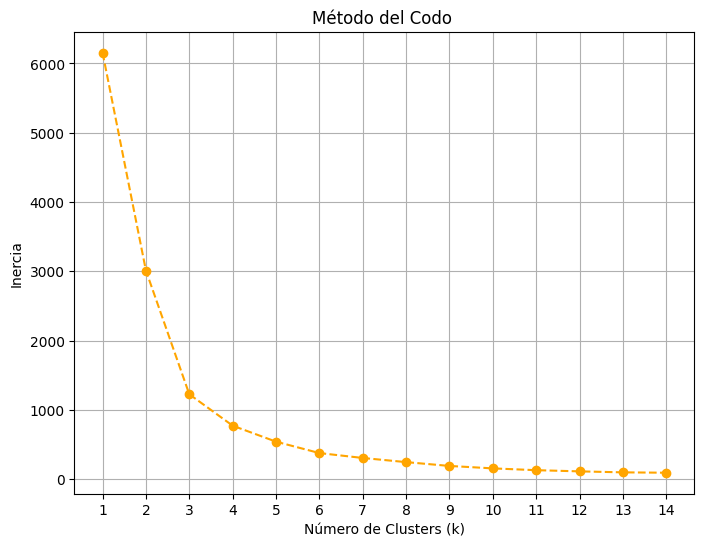

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


file_path = 'tramites_gob_bo_preprocesado_one_hot_weka.csv'


data = pd.read_csv(file_path)


columns_for_clustering = data.columns
data_clustering = data[columns_for_clustering]


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)


pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)


inertia = []
k_range = range(1, 15)  # Rango extendido para k

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_reduced)  # Cambiar a data_scaled si no usas PCA
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='orange')
plt.title('Método del Codo ')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


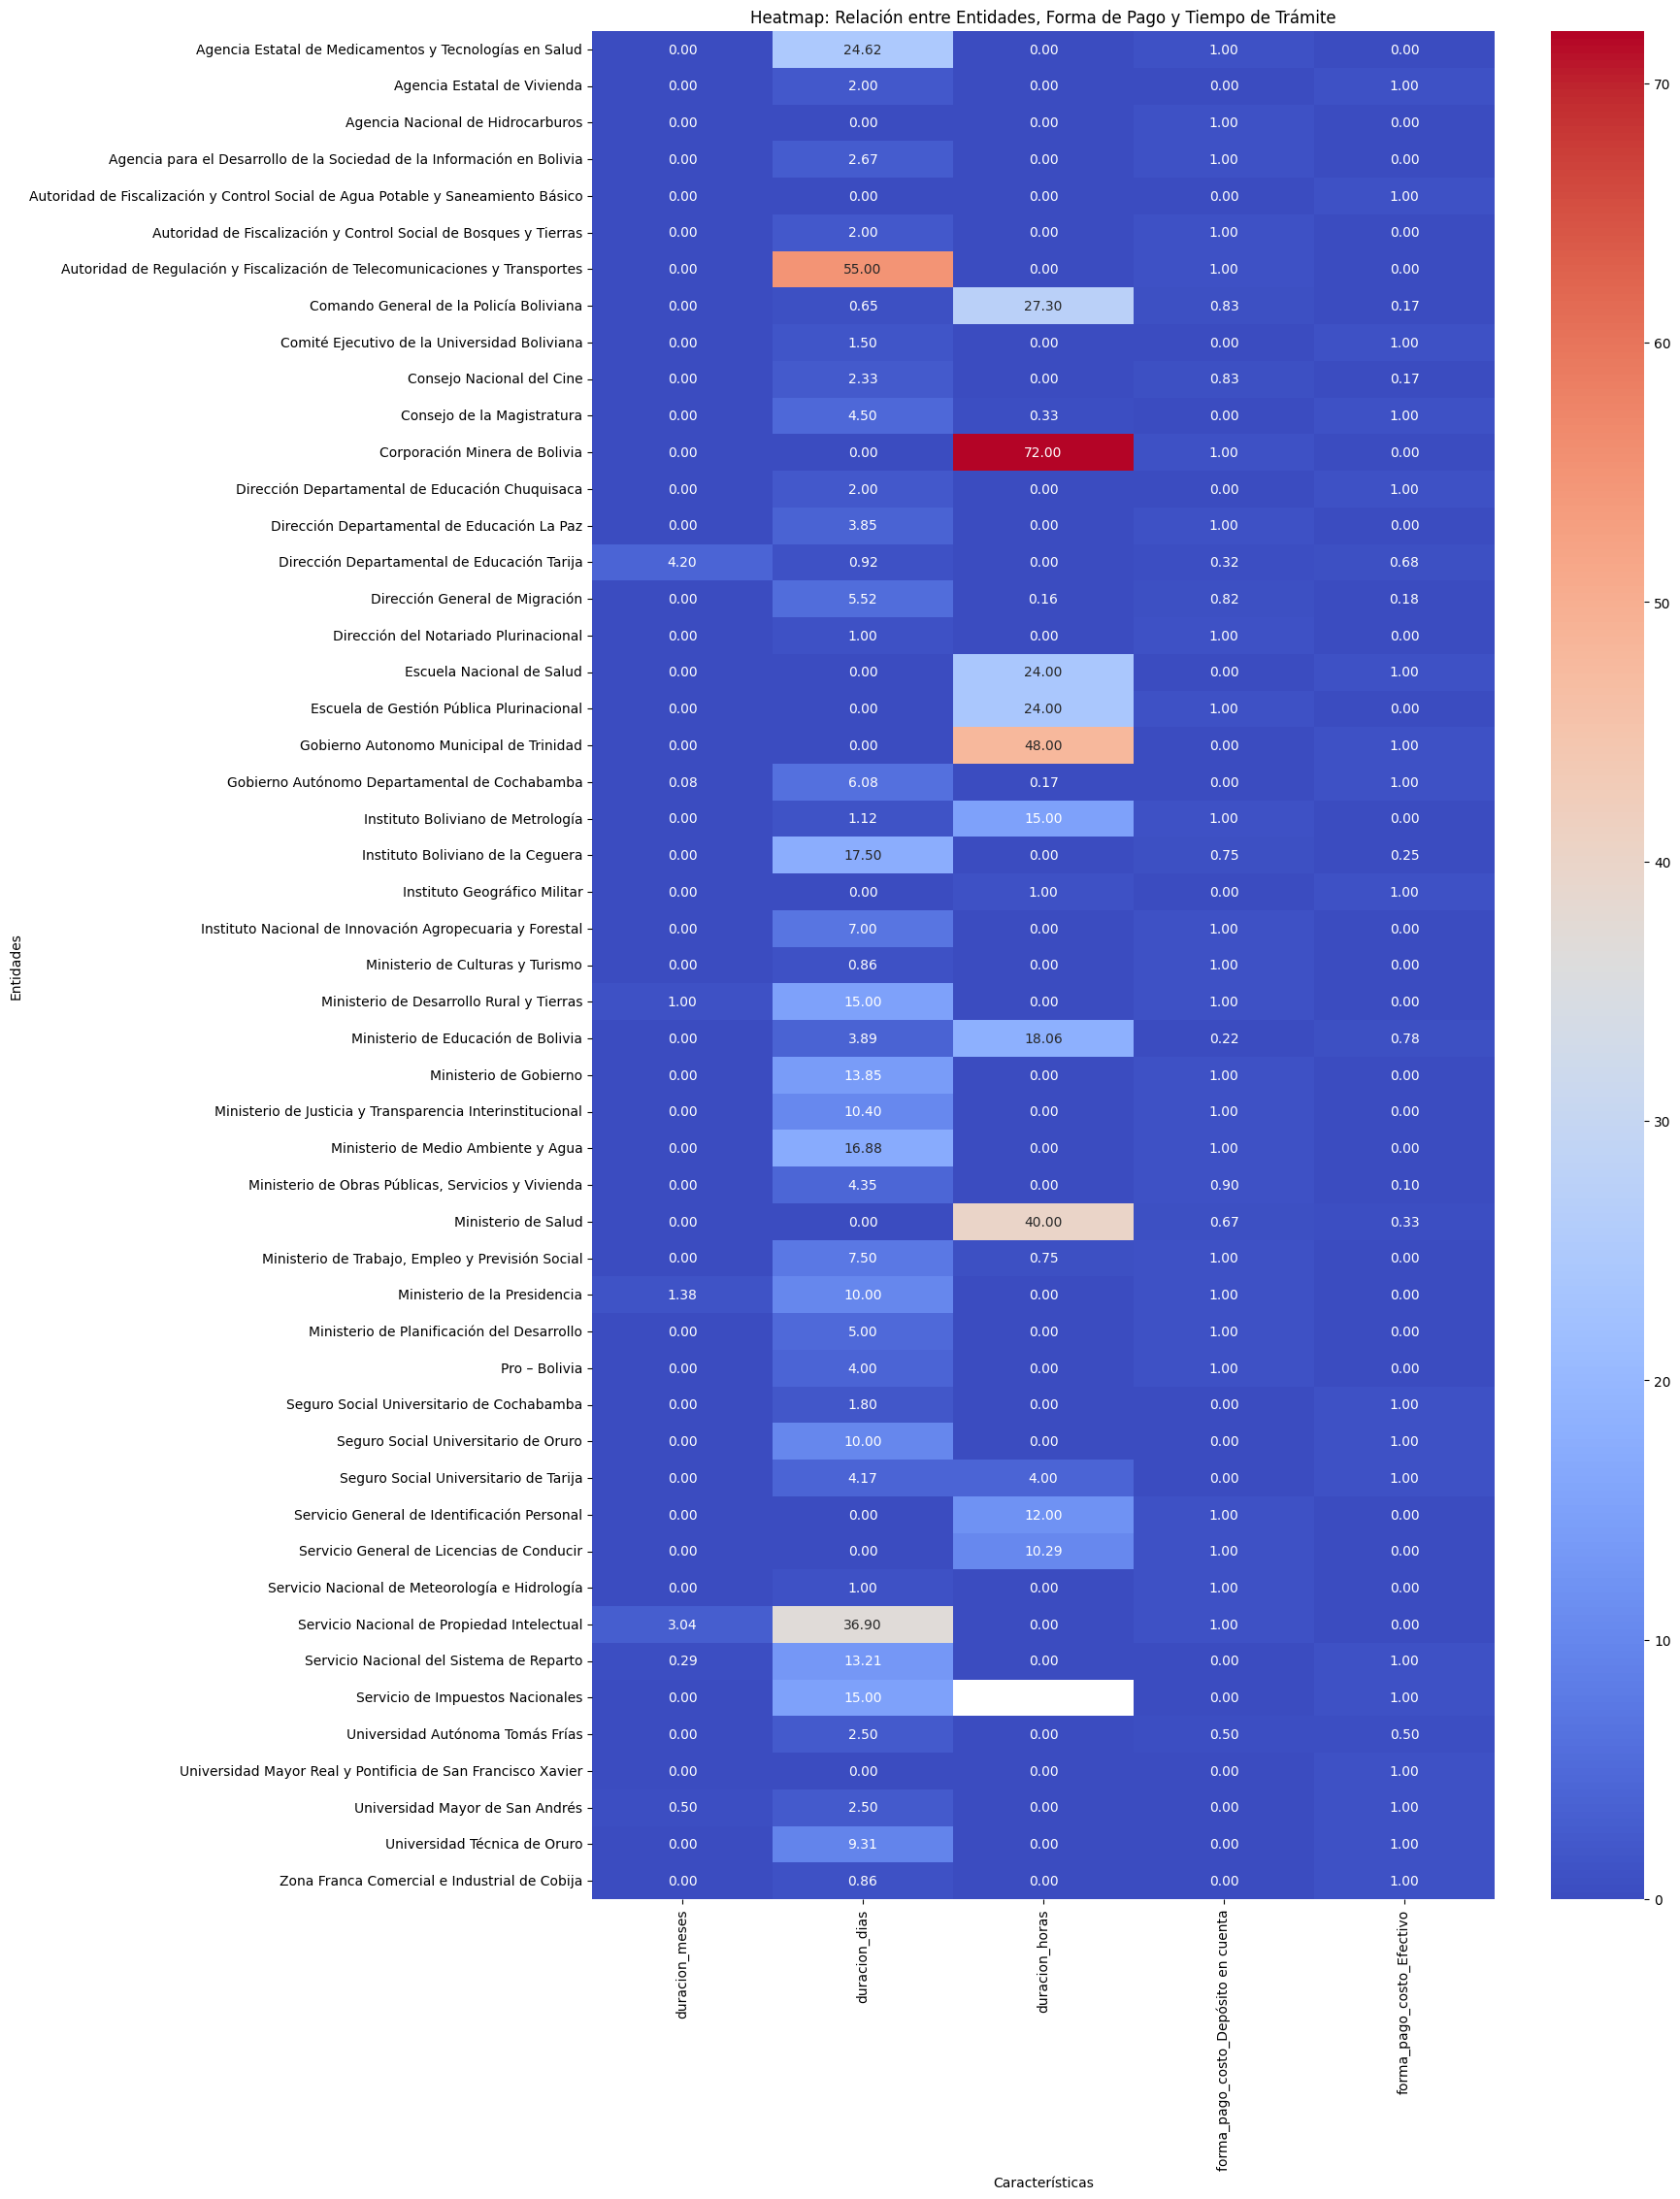

In [9]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset preprocesado
# Reemplaza 'ruta_del_archivo.csv' con la ruta a tu archivo CSV
file_path = 'tramites_gob_bo.csv'
data = pd.read_csv('tramites_gob_bo.csv', delimiter='|')


# Seleccionar columnas relevantes
columns_of_interest = ['denominacion', 'forma_pago_costo', 'duracion_meses', 'duracion_dias', 'duracion_horas']
data_filtered = data[columns_of_interest]

# Convertir la columna 'forma_pago_costo' a variables binarias
data_encoded = pd.get_dummies(data_filtered, columns=['forma_pago_costo'])

# Crear un DataFrame pivote para el heatmap
# Agrupar por entidad y calcular los promedios de las columnas numéricas
heatmap_data = data_encoded.groupby('denominacion').mean()

# Graficar el heatmap
plt.figure(figsize=(15, 25))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap: Relación entre Entidades, Forma de Pago y Tiempo de Trámite')
plt.xlabel('Características')
plt.ylabel('Entidades')
plt.show()


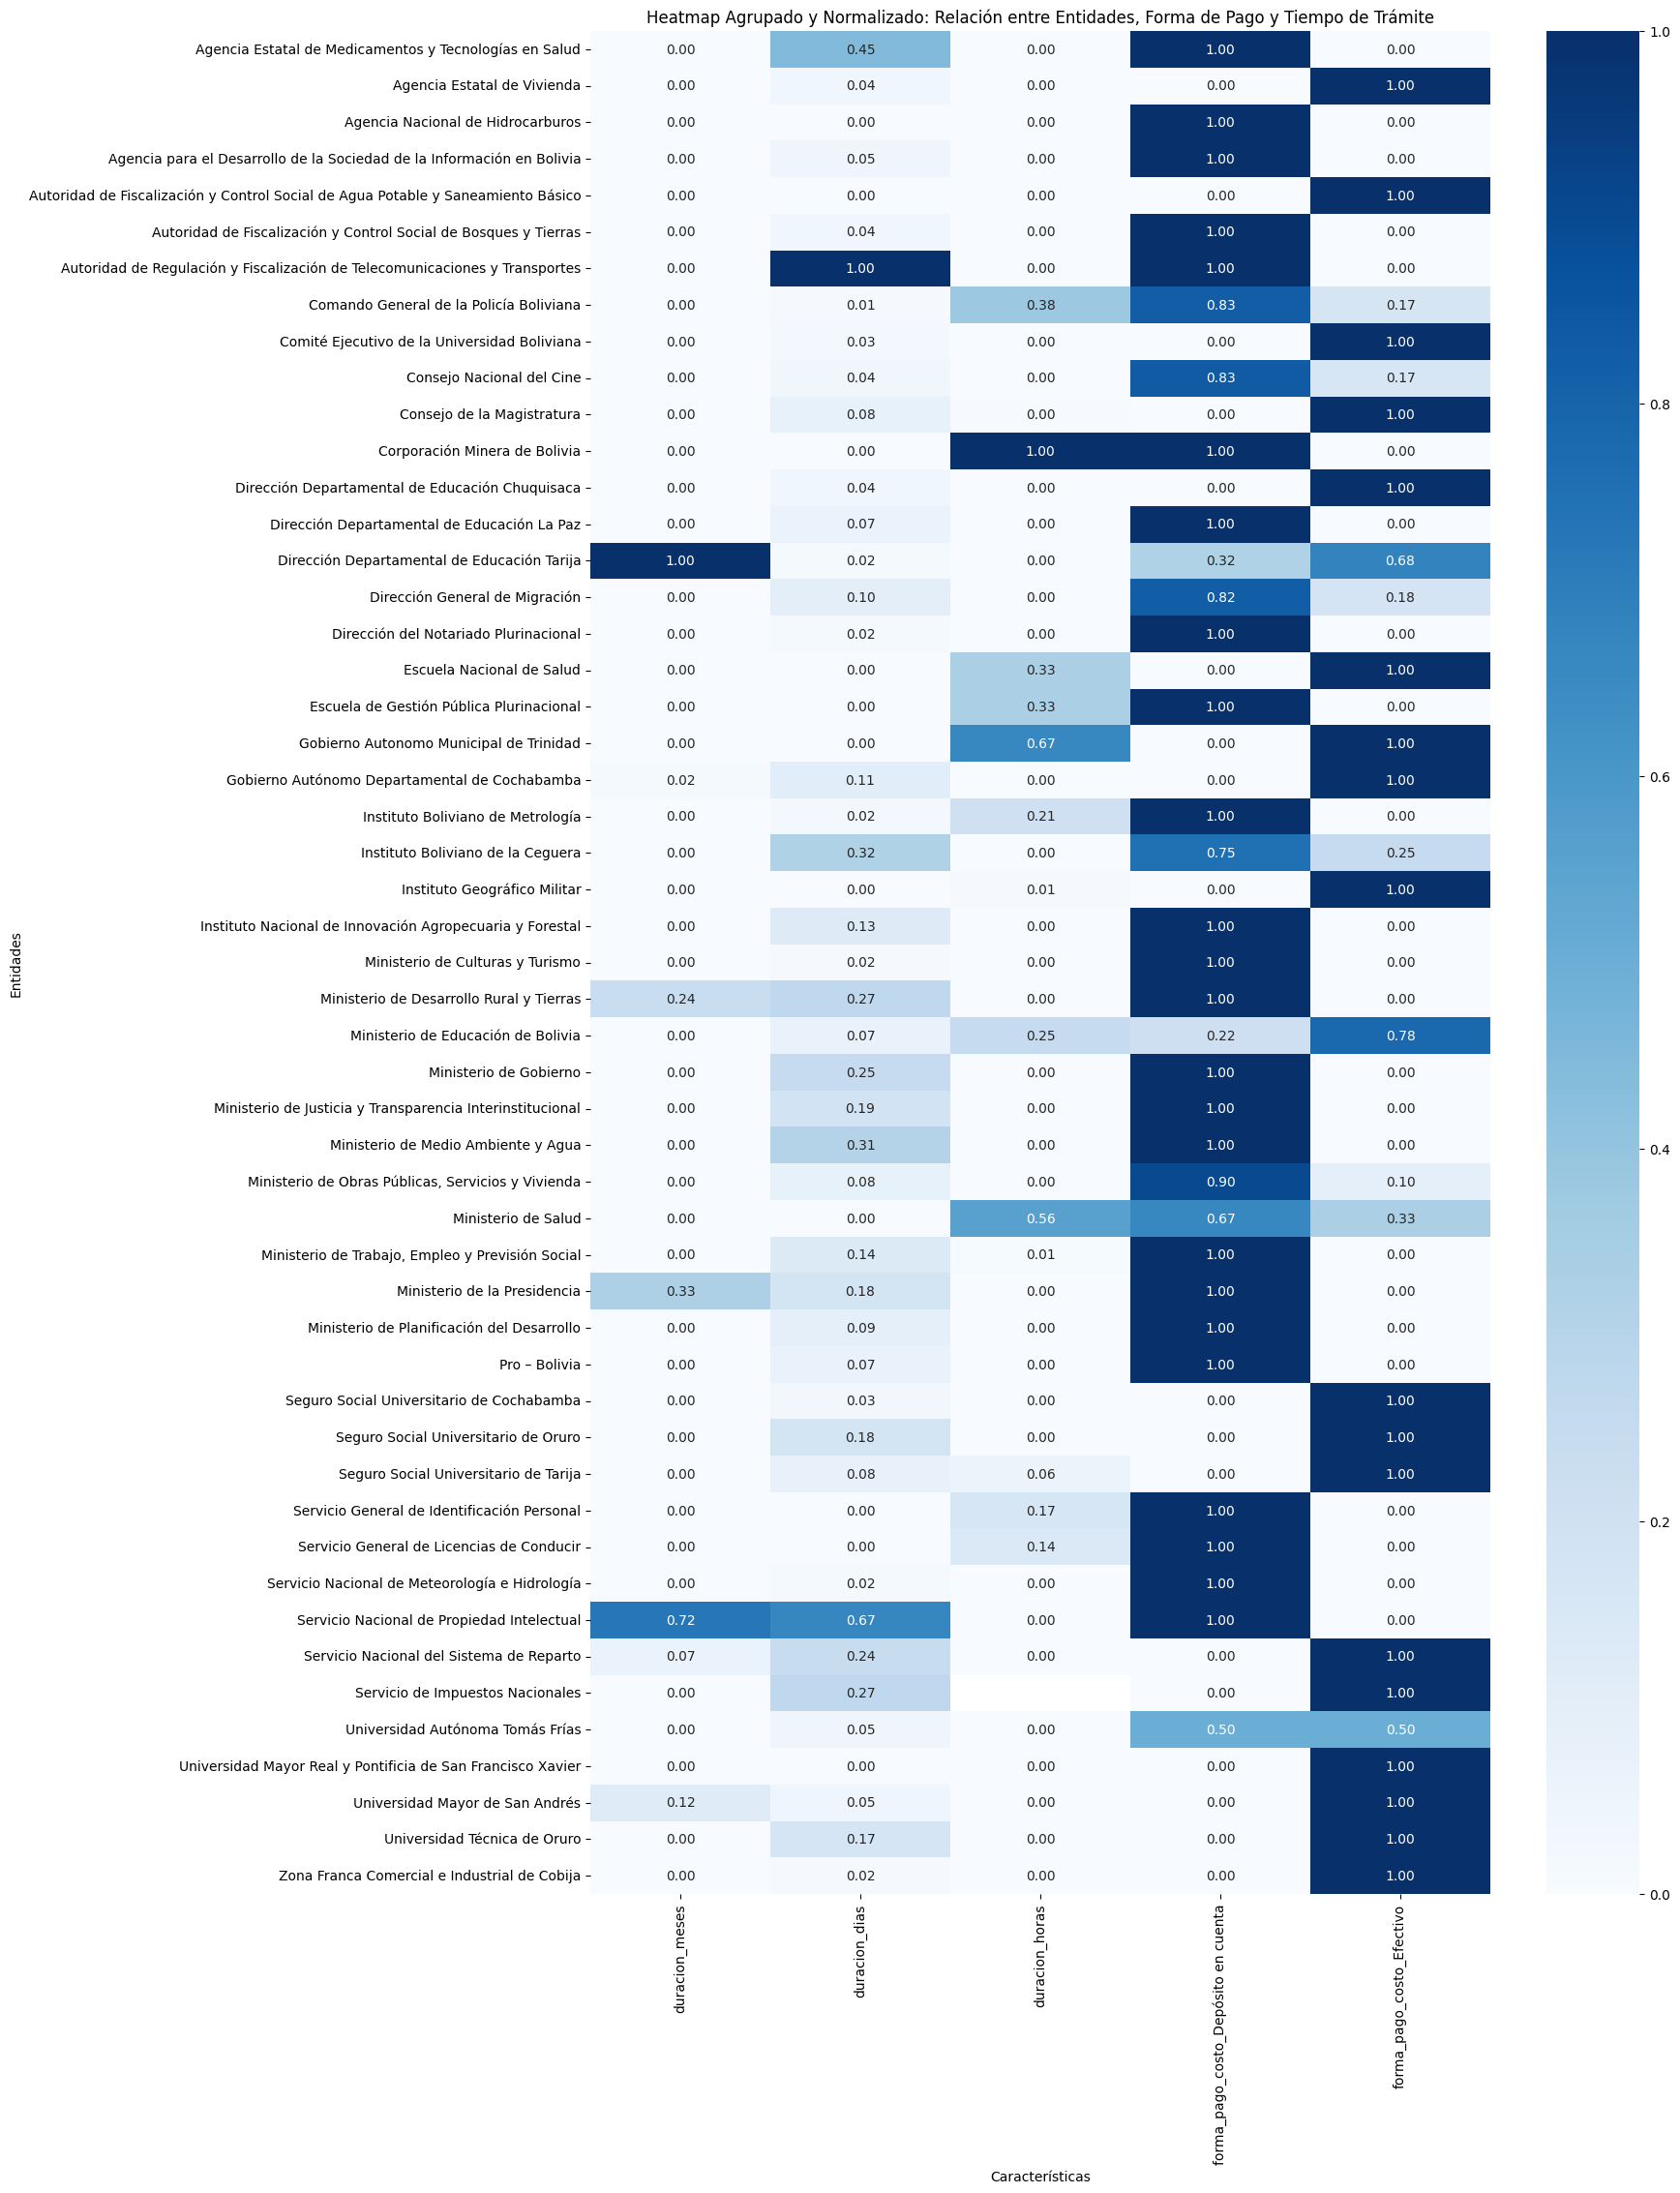

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Ruta del archivo
file_path = 'tramites_gob_bo.csv'
data = pd.read_csv('tramites_gob_bo.csv', delimiter='|')

# Seleccionar columnas relevantes
columns_of_interest = ['denominacion', 'forma_pago_costo', 'duracion_meses', 'duracion_dias', 'duracion_horas']
data_filtered = data[columns_of_interest]

# Convertir la columna 'forma_pago_costo' a variables binarias
data_encoded = pd.get_dummies(data_filtered, columns=['forma_pago_costo'])

# Agrupar por entidad y calcular promedios
data_grouped = data_encoded.groupby('denominacion').mean().reset_index()

# Normalizar los datos numéricos
scaler = MinMaxScaler()
data_normalized = data_grouped.copy()
data_normalized.iloc[:, 1:] = scaler.fit_transform(data_grouped.iloc[:, 1:])  # Excluye la columna de entidades

# Graficar el heatmap agrupado
plt.figure(figsize=(15, 25))  # Ajusta el tamaño del gráfico
sns.heatmap(data_normalized.set_index('denominacion'), annot=True, fmt=".2f", cmap='Blues', cbar=True)
plt.title('Heatmap Agrupado y Normalizado: Relación entre Entidades, Forma de Pago y Tiempo de Trámite')
plt.xlabel('Características')
plt.ylabel('Entidades')
plt.show()

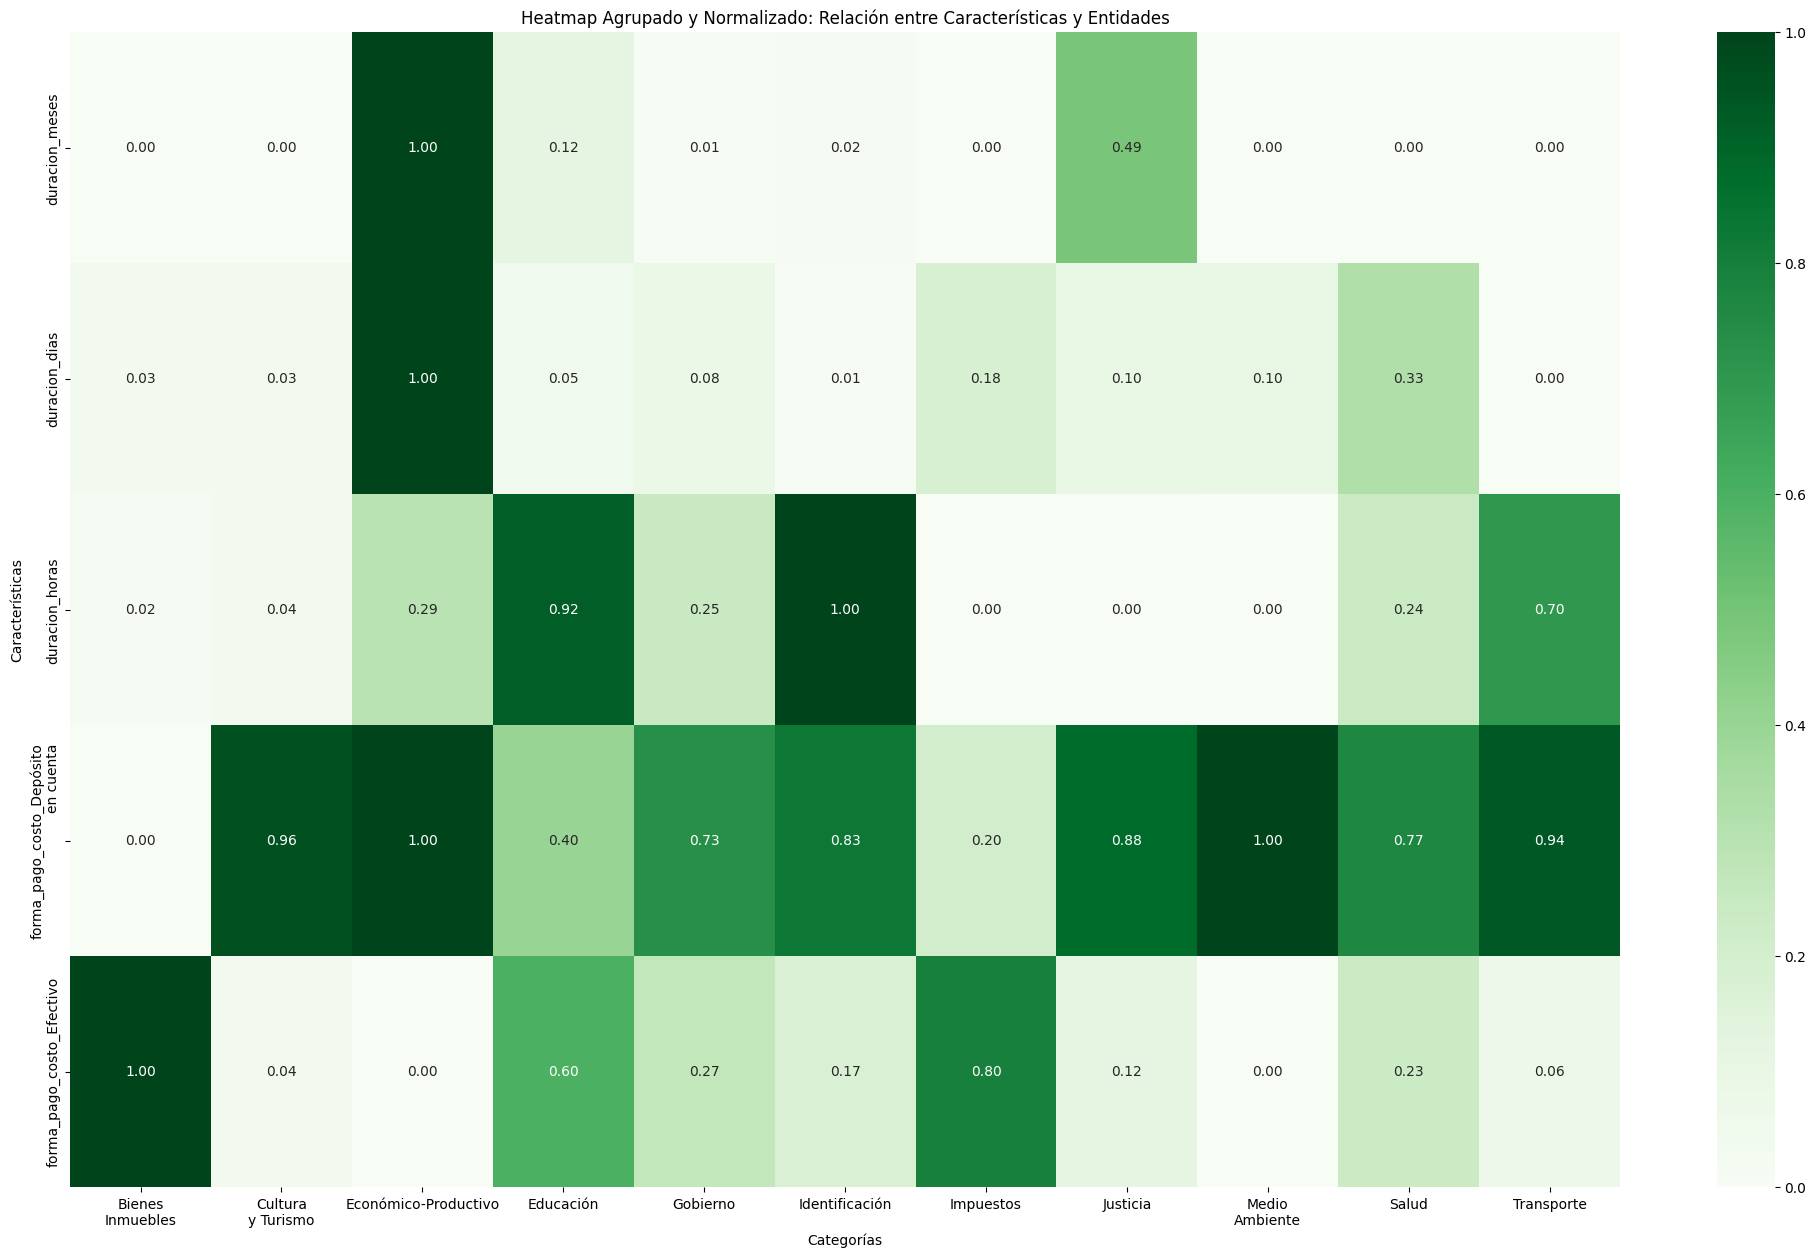

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Ruta del archivo
file_path = 'tramites_gob_bo.csv'
data = pd.read_csv(file_path, delimiter='|')

# Seleccionar columnas relevantes
columns_of_interest = ['descripcion_categoria', 'forma_pago_costo', 'duracion_meses', 'duracion_dias', 'duracion_horas']
data_filtered = data[columns_of_interest]

# Convertir la columna 'forma_pago_costo' a variables binarias
data_encoded = pd.get_dummies(data_filtered, columns=['forma_pago_costo'])

# Agrupar por entidad y calcular promedios
data_grouped = data_encoded.groupby('descripcion_categoria').mean().reset_index()

# Normalizar los datos numéricos
scaler = MinMaxScaler()
data_normalized = data_grouped.copy()
data_normalized.iloc[:, 1:] = scaler.fit_transform(data_grouped.iloc[:, 1:])  # Excluye la columna de entidades

# Modificar etiquetas reemplazando el primer espacio por un salto de línea
data_normalized['descripcion_categoria'] = data_normalized['descripcion_categoria'].str.replace(' ', '\n', 1)
data_normalized.columns = [
    col.replace(' ', '\n', 1) if isinstance(col, str) else col
    for col in data_normalized.columns
]

# Crear el heatmap con las etiquetas modificadas
plt.figure(figsize=(25, 15))  # Ajusta el tamaño del gráfico
sns.heatmap(
    data_normalized.set_index('descripcion_categoria').T, 
    annot=True, fmt=".2f", cmap='Greens', cbar=True
)
plt.title('Heatmap Agrupado y Normalizado: Relación entre Características y Entidades')
plt.xlabel('Categorías')
plt.ylabel('Características')
plt.show()


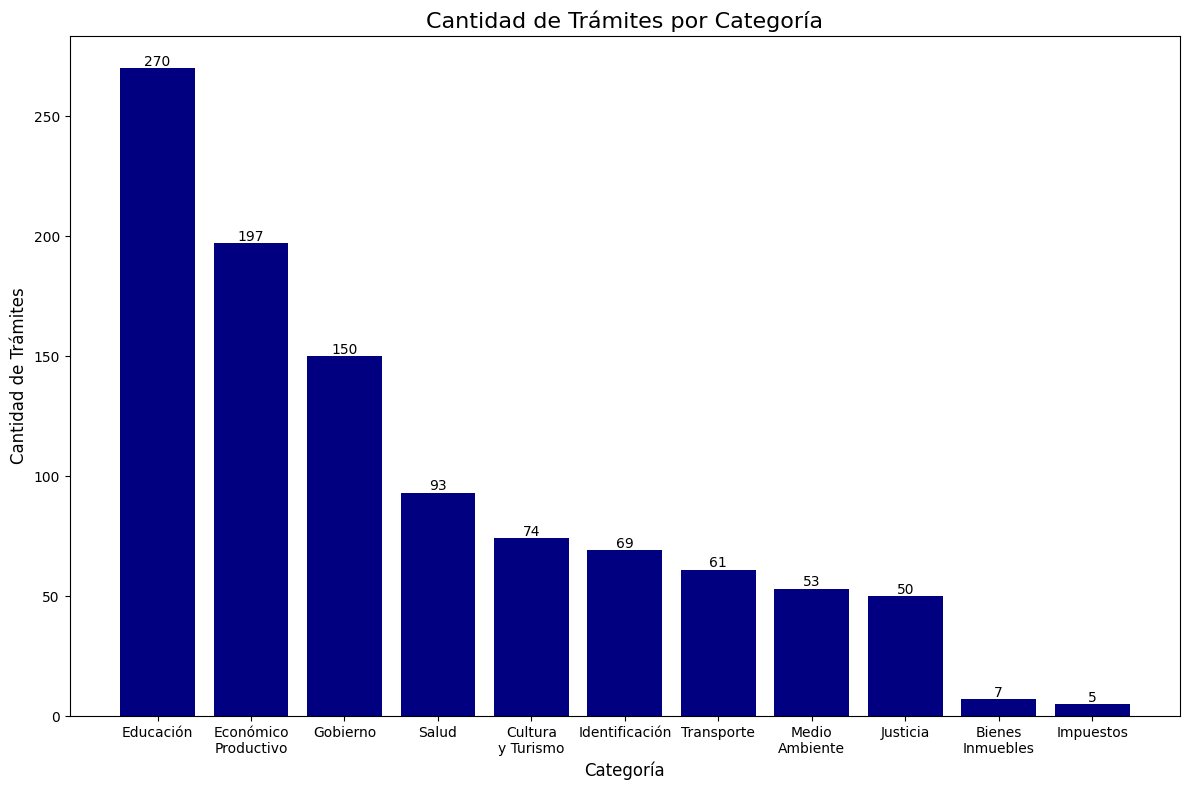

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV con el separador '|'
file_path = 'tramites_gob_bo.csv'  # Cambia 'ruta_del_archivo' a la ubicación real de tu archivo
data = pd.read_csv(file_path, sep='|')

# Contar el número de trámites por categoría
category_counts = data['descripcion_categoria'].value_counts()

def format_label(label):
    if ' ' in label:
        return label.replace(' ', '\n', 1)
    elif '-' in label:
        return label.replace('-', '\n', 1)
    return label

formatted_labels = [format_label(label) for label in category_counts.index]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(formatted_labels, category_counts.values, color='#000080')

plt.title('Cantidad de Trámites por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad de Trámites', fontsize=12)

# Agregar etiquetas a las barras
for index, value in enumerate(category_counts.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10)

plt.tight_layout()

# Mostrar el gráfico
plt.show()

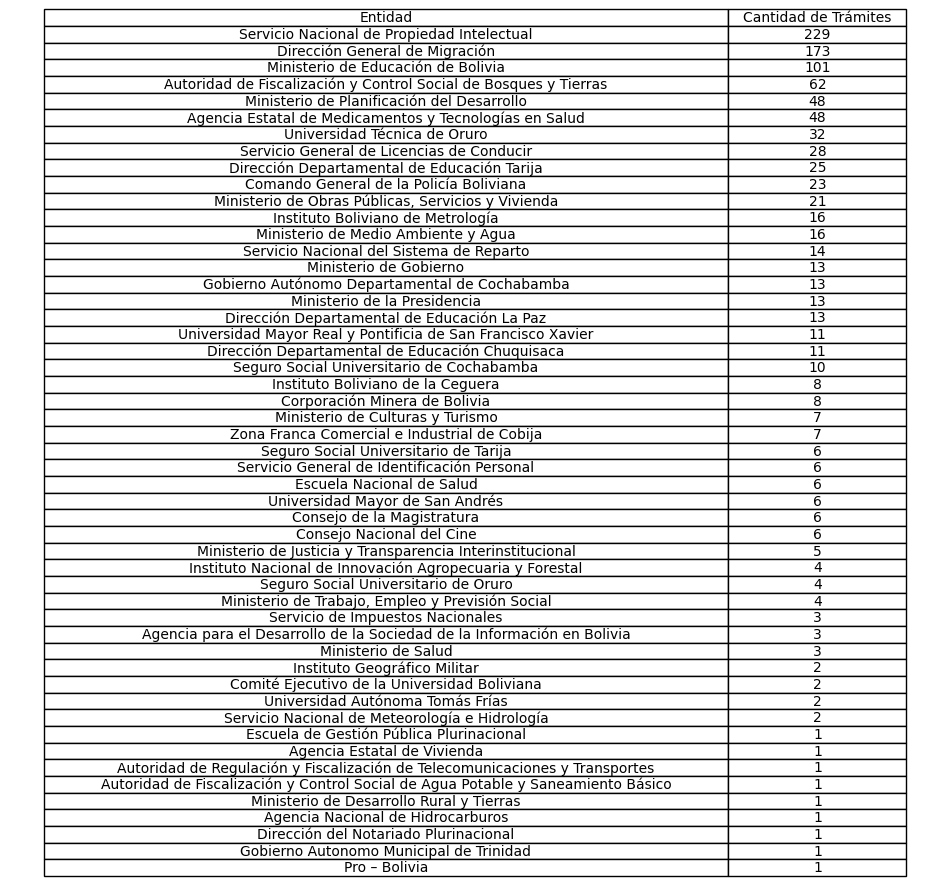

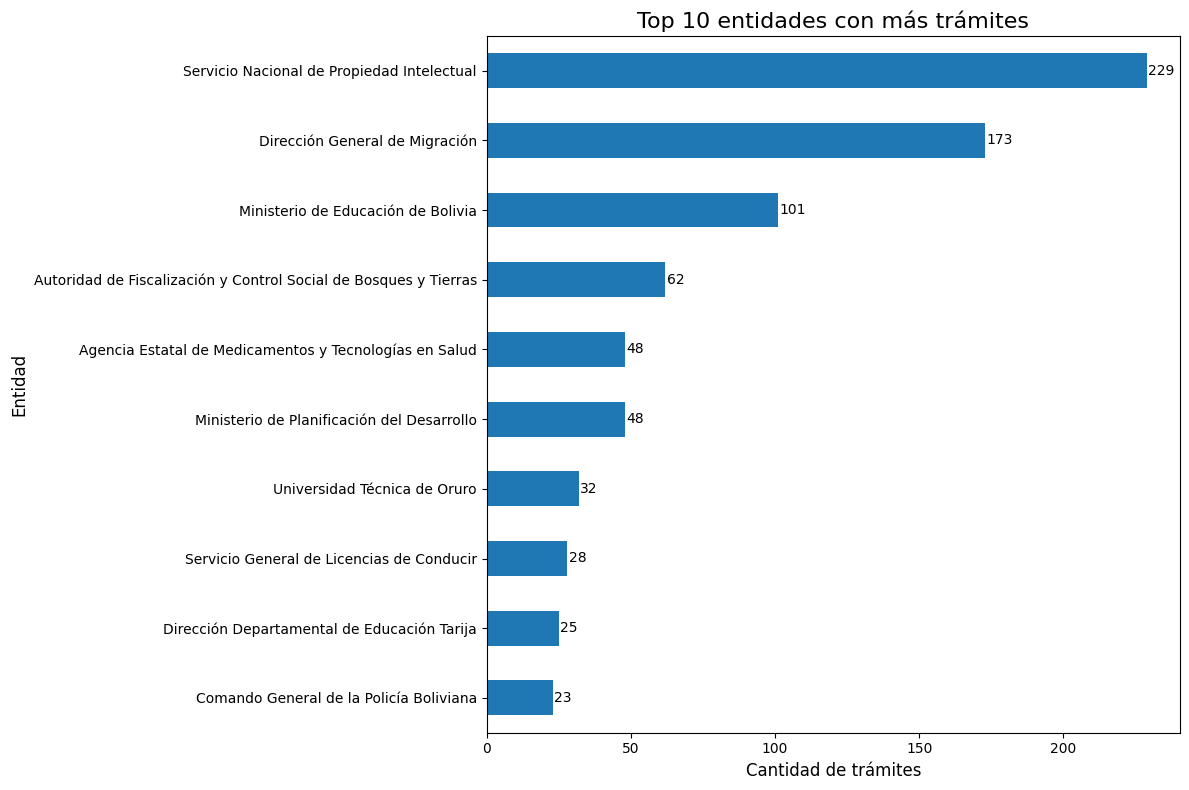

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV con el separador '|'
file_path = 'tramites_gob_bo.csv'  # Cambia 'ruta_del_archivo' a la ubicación real de tu archivo
data = pd.read_csv(file_path, sep='|')

# Contar el número de trámites por entidad
tramites_por_entidad = data['denominacion'].value_counts()

# Crear la tabla como gráfico
tabla_tramites = tramites_por_entidad.reset_index()
tabla_tramites.columns = ['Entidad', 'Cantidad de Trámites']

# Crear el gráfico de tabla
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
tabla = ax.table(
    cellText=tabla_tramites.values,
    colLabels=tabla_tramites.columns,
    cellLoc='center',
    loc='center'
)
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.auto_set_column_width(col=list(range(len(tabla_tramites.columns))))

# Aña
plt.show()

# Filtrar las 10 entidades con más trámites
top_10_entidades = tramites_por_entidad.head(10)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 8))
bars = top_10_entidades.sort_values().plot(kind='barh', color='#1f77b4', figsize=(12, 8))

# Añadir los valores de las barras
for index, value in enumerate(top_10_entidades.sort_values()):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)

# Personalizar el gráfico
plt.title('Top 10 entidades con más trámites', fontsize=16)
plt.xlabel('Cantidad de trámites', fontsize=12)
plt.ylabel('Entidad', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


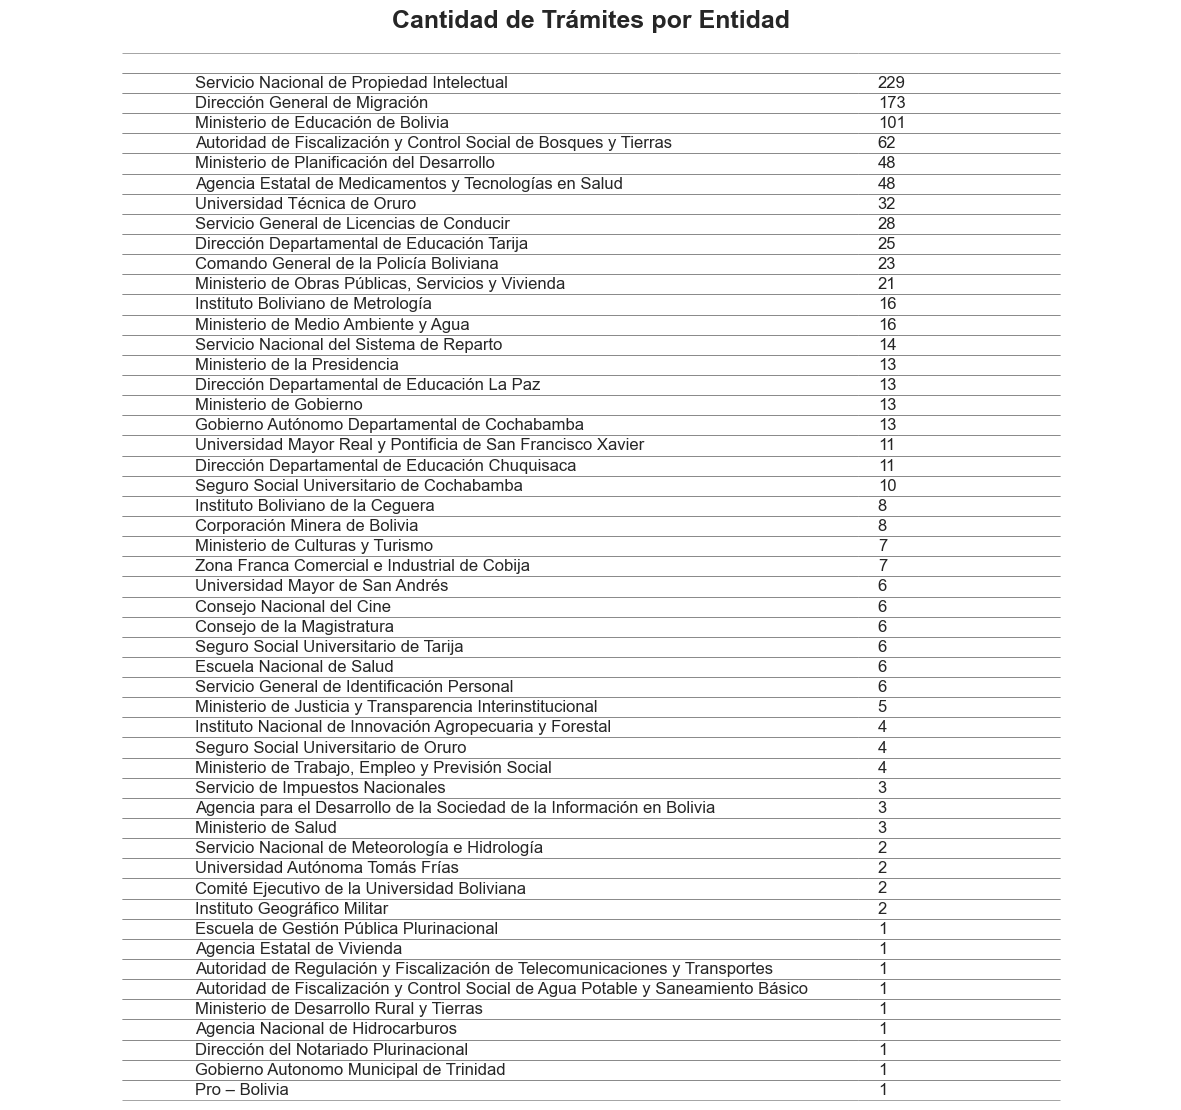

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_13536\293635343.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


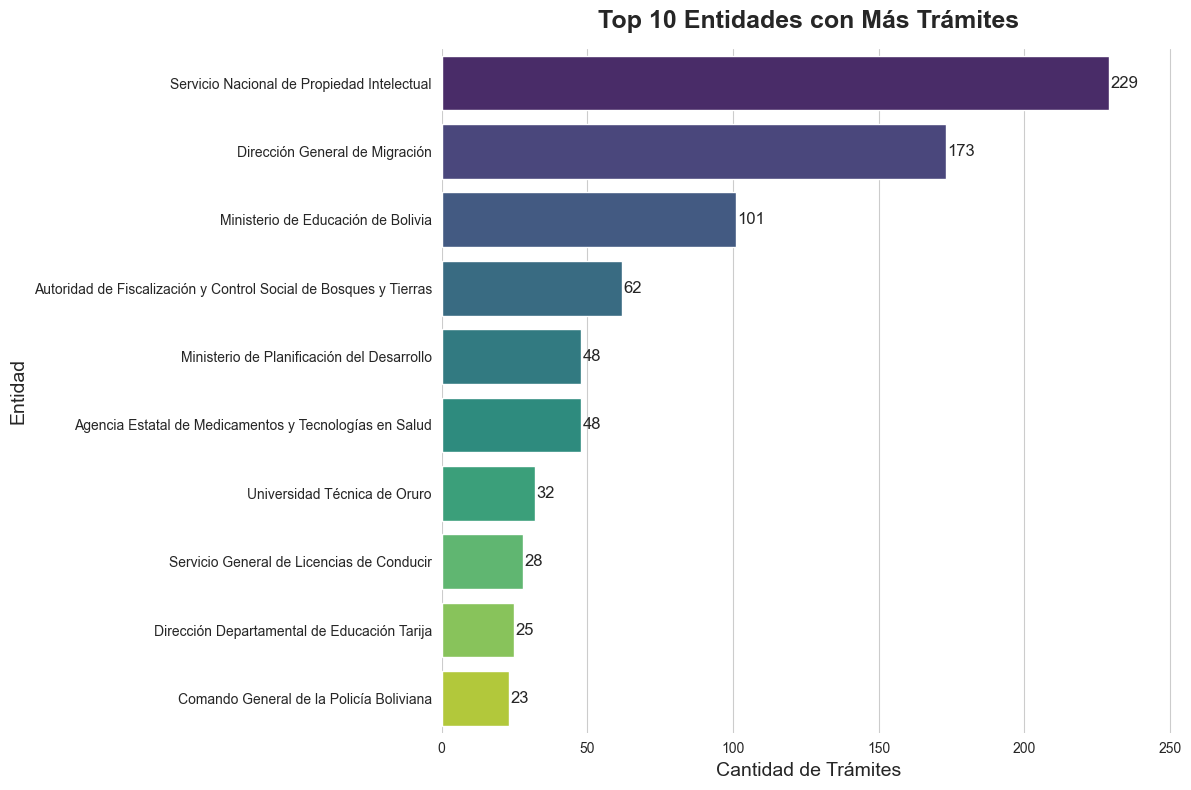

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set_style("whitegrid")
sns.set_palette("deep")

# Cargar el archivo CSV con el separador '|'
file_path = 'tramites_gob_bo.csv'  # Cambia 'tramites_gob_bo.csv' a la ubicación real de tu archivo
data = pd.read_csv(file_path, sep='|')

# Contar el número de trámites por entidad
tramites_por_entidad = data['denominacion'].value_counts()

# Crear la tabla como DataFrame
tabla_tramites = tramites_por_entidad.reset_index()
tabla_tramites.columns = ['Entidad', 'Cantidad de Trámites']

# Ordenar la tabla por 'Cantidad de Trámites' descendente
tabla_tramites.sort_values(by='Cantidad de Trámites', ascending=False, inplace=True)

# Restablecer el índice después de ordenar
tabla_tramites.reset_index(drop=True, inplace=True)

# Crear el gráfico de tabla con mejor estética
fig, ax = plt.subplots(figsize=(12, len(tabla_tramites) * 0.2 + 1))
ax.axis('off')

# Crear una tabla con formato mejorado
tabla = ax.table(
    cellText=tabla_tramites.values,
    colLabels=tabla_tramites.columns,
    cellLoc='left',
    loc='center',
    edges='horizontal'
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(12)

# Ajustar las columnas al contenido
tabla.auto_set_column_width(col=list(range(len(tabla_tramites.columns))))

# Aplicar formato a las celdas
for (row, col), cell in tabla.get_celld().items():
    cell.set_edgecolor('grey')
    cell.set_linewidth(0.5)
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#2a7de1')
    else:
        if row % 2 == 0:
            cell.set_facecolor('#f2f2f2')
        else:
            cell.set_facecolor('white')

# Añadir un título
plt.title('Cantidad de Trámites por Entidad', fontsize=18, fontweight='bold', pad=20)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Filtrar las 10 entidades con más trámites
top_10_entidades = tramites_por_entidad.head(10)

# Crear el gráfico de barras horizontal con Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=top_10_entidades.values,
    y=top_10_entidades.index,
    palette='viridis',
    orient='h'
)

# Añadir los valores de las barras
for i, (value, name) in enumerate(zip(top_10_entidades.values, top_10_entidades.index)):
    plt.text(value + 0.5, i, f'{value}', va='center', fontsize=12)

# Personalizar el gráfico
plt.title('Top 10 Entidades con Más Trámites', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Cantidad de Trámites', fontsize=14)
plt.ylabel('Entidad', fontsize=14)
plt.xlim(0, top_10_entidades.values.max() + top_10_entidades.values.max() * 0.1)
plt.tight_layout()

# Eliminar las líneas superiores y derechas del cuadro
sns.despine(left=True, bottom=True)

# Mostrar el gráfico
plt.show()


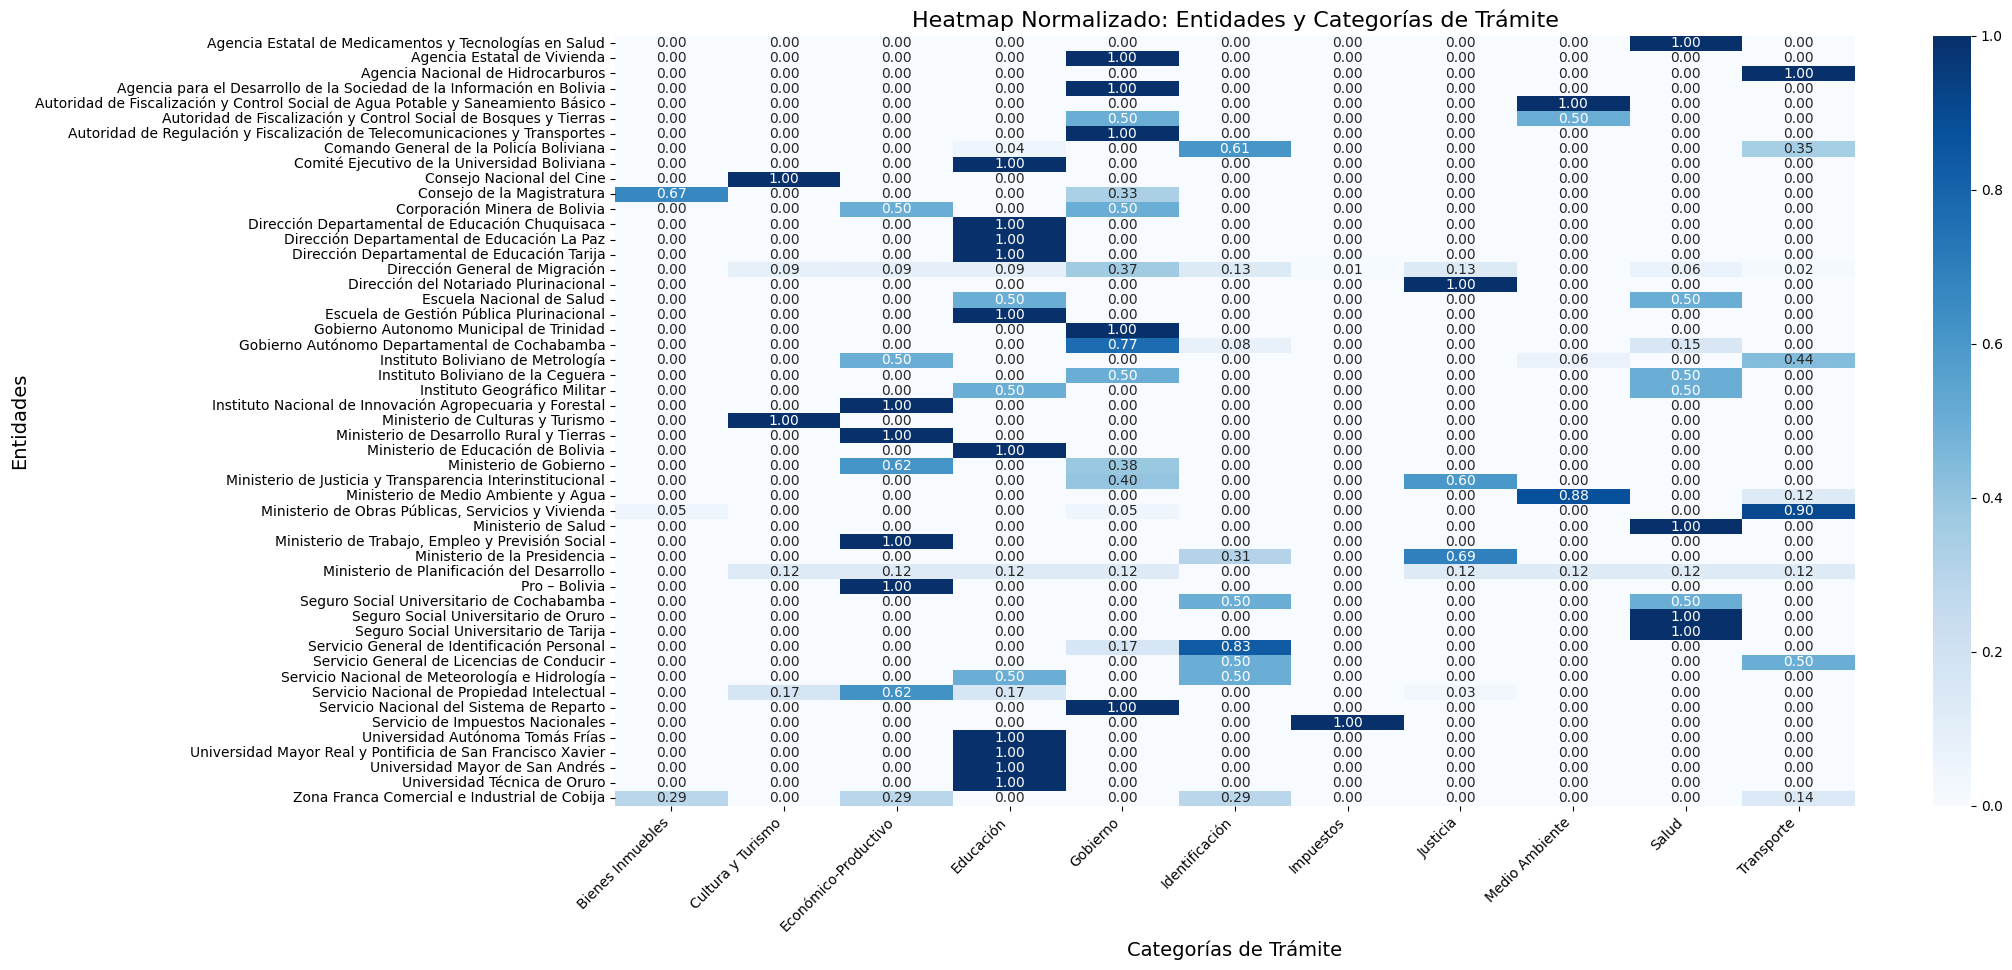

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo
file_path = 'tramites_gob_bo.csv'

# Cargar el archivo CSV
data = pd.read_csv(file_path, delimiter='|')

# Seleccionar columnas de interés
columns_of_interest = ['denominacion', 'descripcion_categoria']
data_filtered = data[columns_of_interest]

# Crear una tabla cruzada (contingencia) entre entidad y categoría de trámite
heatmap_data = pd.crosstab(data_filtered['denominacion'], data_filtered['descripcion_categoria'])

# Normalizar los datos por filas (entidades)
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Crear el heatmap con los datos normalizados
plt.figure(figsize=(20, 10))  # Ajustar el tamaño del gráfico
sns.heatmap(heatmap_data_normalized, cmap='Blues', annot=True, fmt=".2f", cbar=True)
plt.title('Heatmap Normalizado: Entidades y Categorías de Trámite', fontsize=16)
plt.xlabel('Categorías de Trámite', fontsize=14)
plt.ylabel('Entidades', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje X para mejor visibilidad
plt.yticks(rotation=0)  # Mantener etiquetas del eje Y horizontales
plt.show()


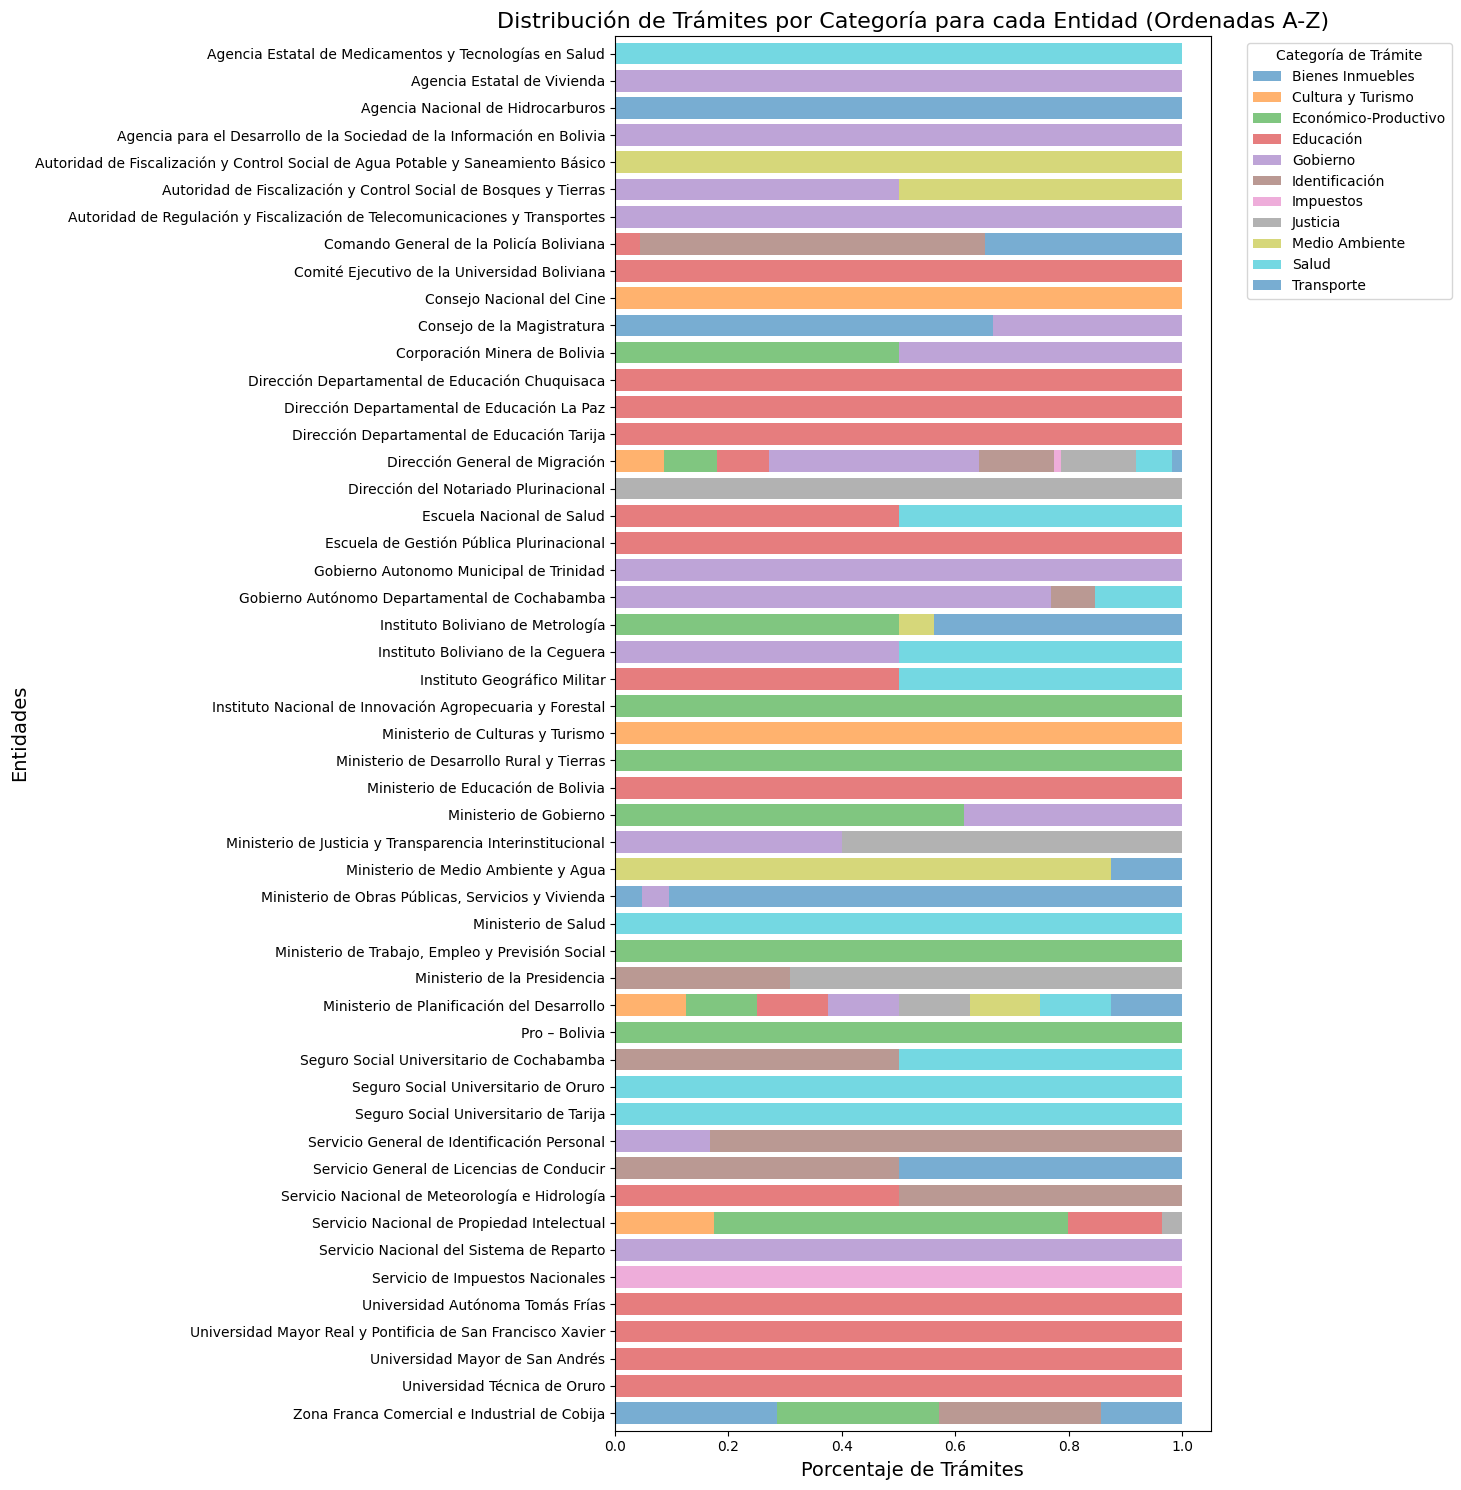

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo
file_path = 'tramites_gob_bo.csv'

# Cargar el archivo CSV
data = pd.read_csv(file_path, delimiter='|')

# Seleccionar columnas de interés
columns_of_interest = ['denominacion', 'descripcion_categoria']
data_filtered = data[columns_of_interest]

# Crear una tabla cruzada (contingencia) entre entidad y categoría de trámite
crosstab_data = pd.crosstab(data_filtered['denominacion'], data_filtered['descripcion_categoria'])

# Calcular proporciones (normalización por filas)
crosstab_normalized = crosstab_data.div(crosstab_data.sum(axis=1), axis=0)

# Ordenar las entidades alfabéticamente
crosstab_normalized = crosstab_normalized.sort_index(ascending=False)

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(15, 15))

# Crear colores más claros usando transparencia (alfa)
original_colors = plt.cm.tab10.colors  # Colores de la paleta tab10
lighter_colors = [(r, g, b, 0.6) for r, g, b in original_colors]  # Aplicar alfa de 0.6 para mayor claridad

# Crear el gráfico de barras apiladas (horizontal) con colores más claros
bars = crosstab_normalized.plot(kind='barh', stacked=True, ax=ax, color=lighter_colors, width=0.8)



# Configurar título y etiquetas
plt.title('Distribución de Trámites por Categoría para cada Entidad (Ordenadas A-Z)', fontsize=16)
plt.xlabel('Porcentaje de Trámites', fontsize=14)
plt.ylabel('Entidades', fontsize=14)
plt.legend(title='Categoría de Trámite', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


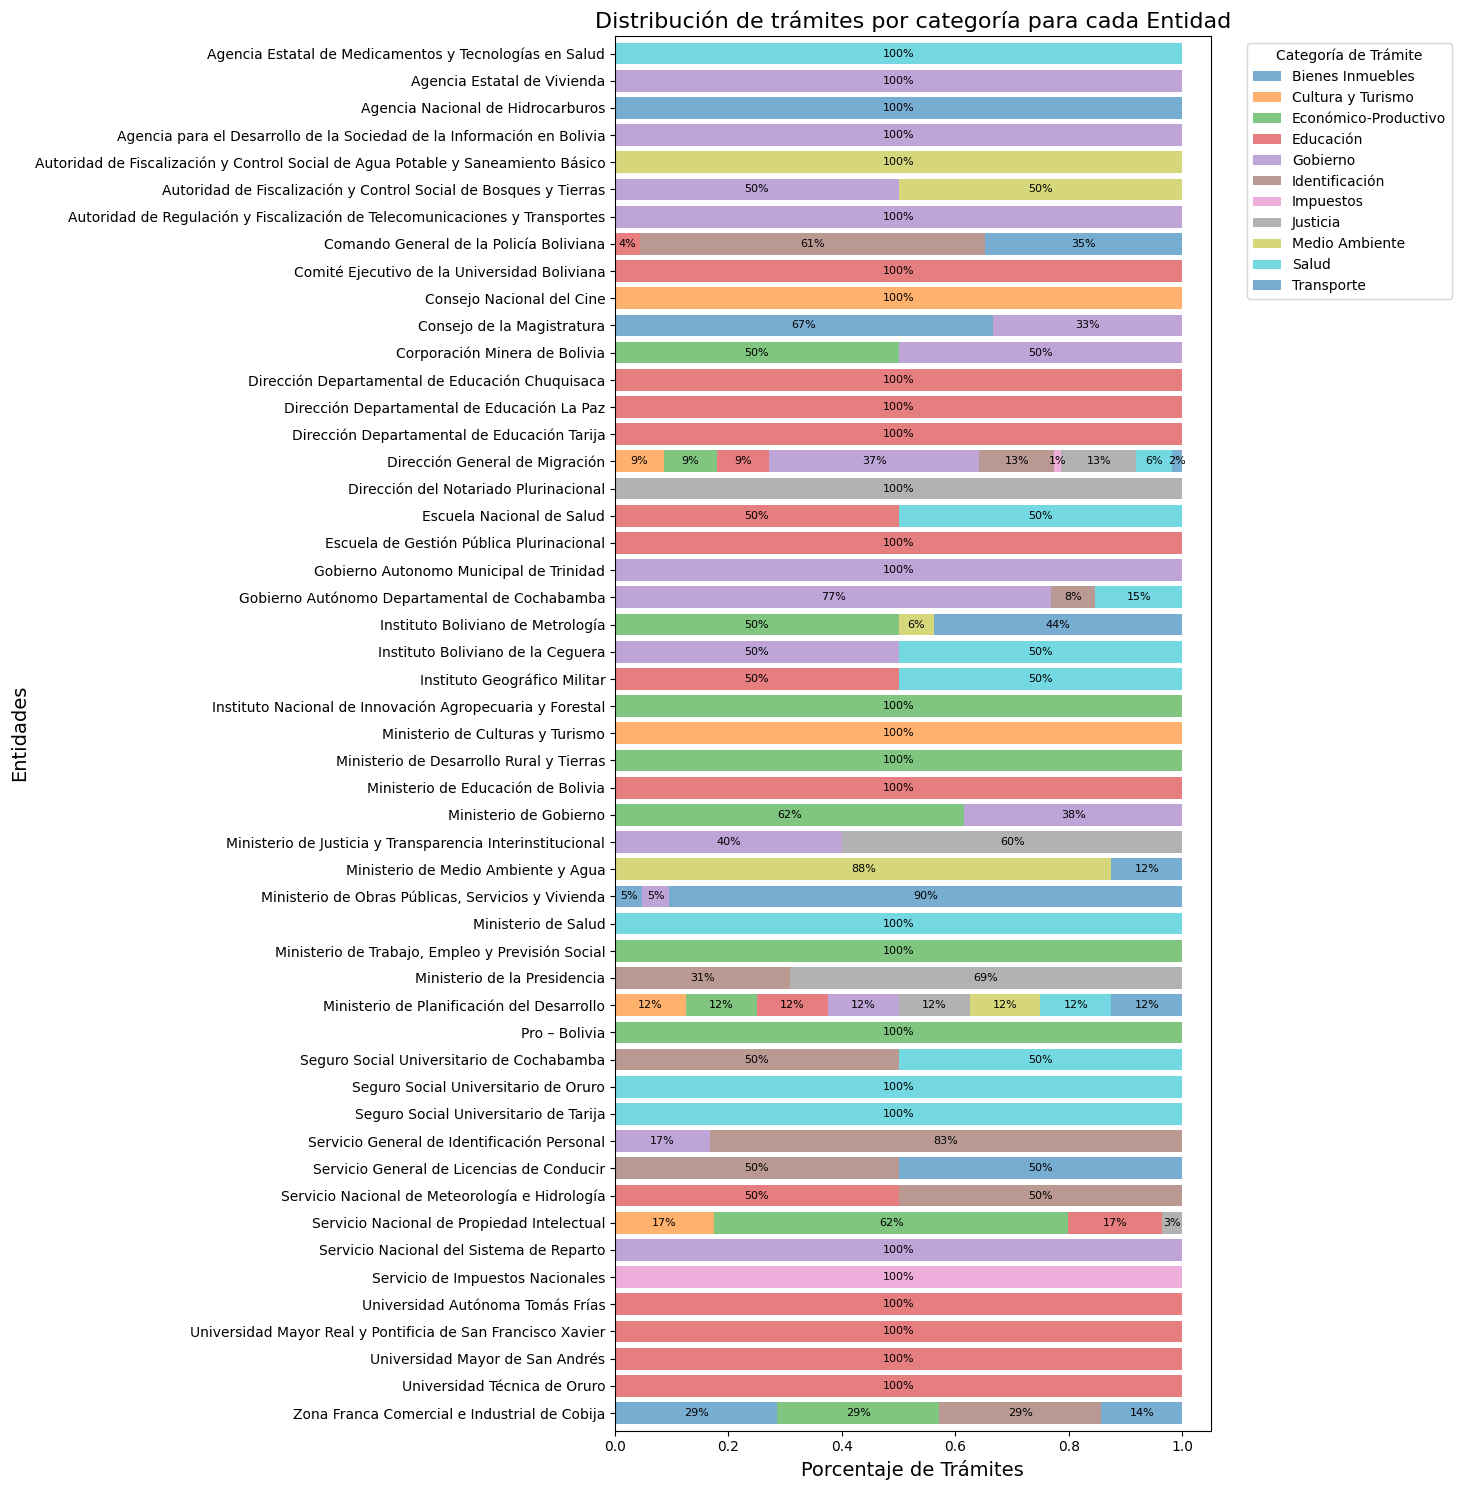

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo
file_path = 'tramites_gob_bo.csv'

# Cargar el archivo CSV
data = pd.read_csv(file_path, delimiter='|')

# Seleccionar columnas de interés
columns_of_interest = ['denominacion', 'descripcion_categoria']
data_filtered = data[columns_of_interest]

# Crear una tabla cruzada (contingencia) entre entidad y categoría de trámite
crosstab_data = pd.crosstab(data_filtered['denominacion'], data_filtered['descripcion_categoria'])

# Calcular proporciones (normalización por filas)
crosstab_normalized = crosstab_data.div(crosstab_data.sum(axis=1), axis=0)

# Ordenar las entidades alfabéticamente
crosstab_normalized = crosstab_normalized.sort_index(ascending=False)

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(15, 15))

# Crear colores más claros usando transparencia (alfa)
original_colors = plt.cm.tab10.colors  # Colores de la paleta tab10
lighter_colors = [(r, g, b, 0.6) for r, g, b in original_colors]  # Aplicar alfa de 0.6 para mayor claridad

# Crear el gráfico de barras apiladas (horizontal) con colores más claros
bars = crosstab_normalized.plot(kind='barh', stacked=True, ax=ax, color=lighter_colors, width=0.8)

# Agregar etiquetas de porcentaje en las barras
for i, (entity, row) in enumerate(crosstab_normalized.iterrows()):  # Iterar por entidades
    cumulative_width = 0  # Ancho acumulado para posicionar las etiquetas
    for j, value in enumerate(row):  # Iterar por cada categoría
        if value > 0:  # Solo etiquetar si el valor es mayor a 0
            ax.text(cumulative_width + value / 2, i, f'{value:.0%}',  # Mostrar como porcentaje
                    ha='center', va='center', fontsize=8, color='black')
            cumulative_width += value  # Actualizar el ancho acumulado

# Configurar título y etiquetas
plt.title('Distribución de trámites por categoría para cada Entidad', fontsize=16)
plt.xlabel('Porcentaje de Trámites', fontsize=14)
plt.ylabel('Entidades', fontsize=14)
plt.legend(title='Categoría de Trámite', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


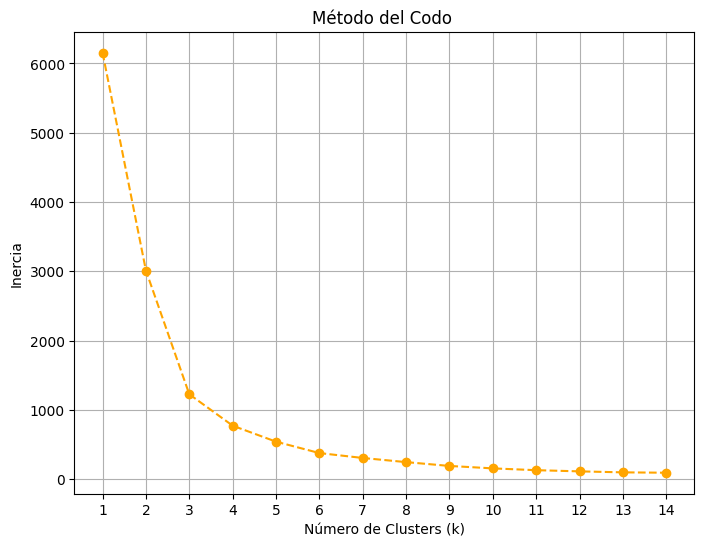

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Ruta del archivo
file_path = 'tramites_gob_bo_preprocesado_one_hot_weka.csv'

# Cargar el dataset
data = pd.read_csv(file_path)

# Seleccionar todas las columnas numéricas para clustering
columns_for_clustering = data.columns
data_clustering = data[columns_for_clustering]

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Reducir dimensionalidad con PCA (opcional)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

# --------------------------------------------
# Método del codo con un rango mayor de k
# --------------------------------------------
inertia = []
k_range = range(1, 15)  # Rango extendido para k

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_reduced)  # Cambiar a data_scaled si no usas PCA
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='orange')
plt.title('Método del Codo ')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


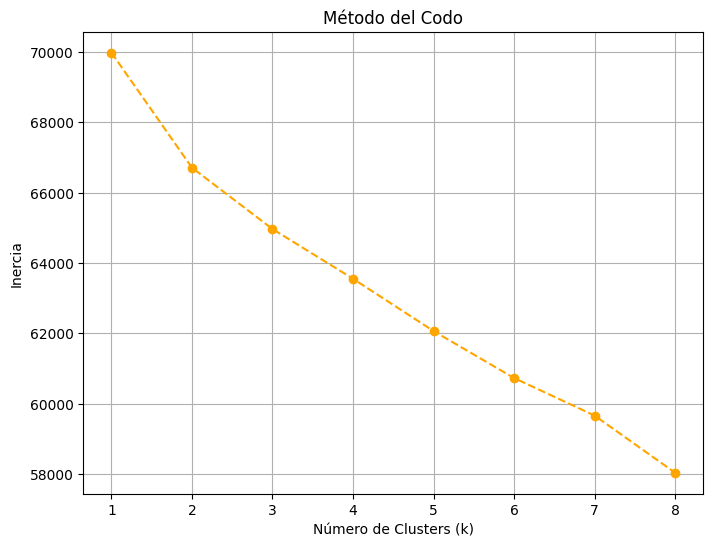

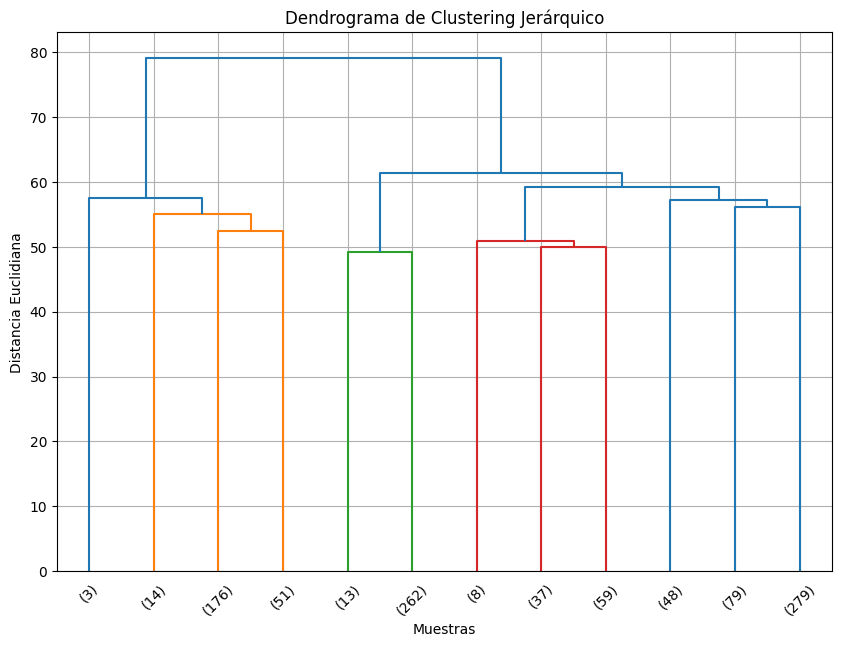

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Ruta del archivo
file_path = 'tramites_gob_bo_preprocesado_one_hot_weka.csv'

# Cargar el dataset
data = pd.read_csv(file_path)

# Seleccionar todas las columnas numéricas para clustering
columns_for_clustering = data.columns
data_clustering = data[columns_for_clustering]

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# --------------------------------------------
# Método del codo
# --------------------------------------------
inertia = []
k_range = range(1, 9)  # Probar k desde 1 hasta 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='orange')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# --------------------------------------------
# Dendrograma
# --------------------------------------------
linked = linkage(data_scaled, method='ward')  # Usar el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia Euclidiana')
plt.grid(True)
plt.show()
